<a href="https://colab.research.google.com/github/TrovaBruno/A3_Inteligencia_Artificial/blob/main/A3_Atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
td = pd.read_csv('UCL_AllTime_Performance_Table_1.csv', encoding='latin1')


In [6]:
td.columns

Index(['#;Team;M.;W;D;L;goals;Dif;Pt.'], dtype='object')

In [8]:
td.head()

,#;Team;M.;W;D;L;goals;Dif;Pt.
1;Real Madrid;491;294;85;112;1079,542;533;533
2;Bayern Munich;392;233;78;81;822,391;427;427
3;FC Barcelona;337;195;75;67;671,347;319;319
4;Manchester United;285;151;67;67;512,290;224;224
5;Juventus;301;153;69;79;475,302;171;171


In [14]:
td.columns[0]

'#'

In [13]:
td = pd.read_csv('UCL_AllTime_Performance_Table_1.csv', sep=';', encoding='latin1')

In [15]:
td.drop(['#'],axis=1,inplace=True)

In [16]:
print(td.dtypes)

Team     object
M.        int64
W         int64
D         int64
L         int64
goals    object
Dif       int64
Pt.       int64
dtype: object


In [21]:
td[['goals_marcados', 'goals_sofridos']] = td['goals'].str.split(', ', expand=True)

In [28]:
td.head()

,Team,M.,W,D,L,goals,Dif,Pt.,goals_marcados,goals_sofridos,gols_marcados,gols_sofridos
0,Real Madrid,491,294,85,112,"1079, 542",533,533,1079,542,"1079, 542",None
1,Bayern Munich,392,233,78,81,"822, 391",427,427,822,391,"822, 391",None
2,FC Barcelona,337,195,75,67,"671, 347",319,319,671,347,"671, 347",None
3,Manchester United,285,151,67,67,"512, 290",224,224,512,290,"512, 290",None
4,Juventus,301,153,69,79,"475, 302",171,171,475,302,"475, 302",None


In [29]:
td.columns[]

'Team'

In [30]:
colunas_para_remover = [5, 6, 10, 11]

In [32]:
td = td.drop(td.columns[colunas_para_remover], axis=1)

In [33]:
td.head()

,Team,M.,W,D,L,Pt.,goals_marcados,goals_sofridos
0,Real Madrid,491,294,85,112,533,1079,542
1,Bayern Munich,392,233,78,81,427,822,391
2,FC Barcelona,337,195,75,67,319,671,347
3,Manchester United,285,151,67,67,224,512,290
4,Juventus,301,153,69,79,171,475,302


In [34]:
td.isnull().sum()

,0
Team,0
M.,0
W,0
D,0
L,0
Pt.,0
goals_marcados,0
goals_sofridos,304


In [36]:
td  = td.dropna(subset=['goals_sofridos'])

In [37]:
td.isnull().sum()

,0
Team,0
M.,0
W,0
D,0
L,0
Pt.,0
goals_marcados,0
goals_sofridos,0


In [38]:
num_linhas = td.shape[0]
print(f"Número de linhas após as exclusões: {num_linhas}")

Número de linhas após as exclusões: 50


In [40]:
td['goals_marcados'] = pd.to_numeric(td['goals_marcados'], errors='coerce')
td['goals_sofridos'] = pd.to_numeric(td['goals_sofridos'], errors='coerce')

grouped = td.groupby('Team')[['goals_marcados', 'goals_sofridos']].mean()

print(grouped)

                     goals_marcados  goals_sofridos
Team                                               
AC Milan                      414.0           260.0
AC Sparta Praha               129.0           154.0
AFC Ajax                      344.0           239.0
AS Monaco                     148.0           138.0
AS Roma                       157.0           157.0
Arsenal FC                    324.0           224.0
Atletico Madrid               245.0           171.0
Bayer Leverkusen              152.0           178.0
Bayern Munich                 822.0           391.0
Borussia Dortmund             307.0           227.0
CSKA Moskva                    87.0           134.0
CSKA Sofia                    118.0           124.0
Celtic FC                     222.0           228.0
Chelsea FC                    334.0           181.0
Club Brugge KV                109.0           145.0
Crvena Zvezda                 205.0           182.0
Deportivo La Corunã            74.0            79.0
Dinamo Kiev 

In [41]:
td['avg_goals_marcados'] = td['goals_marcados'] / td['M.']
td['avg_goals_sofridos'] = td['goals_sofridos'] / td['M.']

# Agrupando por time e calculando as médias
grouped = td.groupby('Team')[['avg_goals_marcados', 'avg_goals_sofridos']].mean()

print(grouped)

                     avg_goals_marcados  avg_goals_sofridos
Team                                                       
AC Milan                       1.586207            0.996169
AC Sparta Praha                1.264706            1.509804
AFC Ajax                       1.600000            1.111628
AS Monaco                      1.510204            1.408163
AS Roma                        1.440367            1.440367
Arsenal FC                     1.611940            1.114428
Atletico Madrid                1.441176            1.005882
Bayer Leverkusen               1.369369            1.603604
Bayern Munich                  2.096939            0.997449
Borussia Dortmund              1.696133            1.254144
CSKA Moskva                    1.060976            1.634146
CSKA Sofia                     1.404762            1.476190
Celtic FC                      1.387500            1.425000
Chelsea FC                     1.695431            0.918782
Club Brugge KV                 1.123711 

In [42]:
grande_quantidade_goals = grouped[grouped['avg_goals_marcados'] > 2]
print(grande_quantidade_goals)

                 avg_goals_marcados  avg_goals_sofridos
Team                                                   
Bayern Munich              2.096939            0.997449
Manchester City            2.114504            1.129771
Olympique Lyon             2.018868            1.556604
Real Madrid                2.197556            1.103870


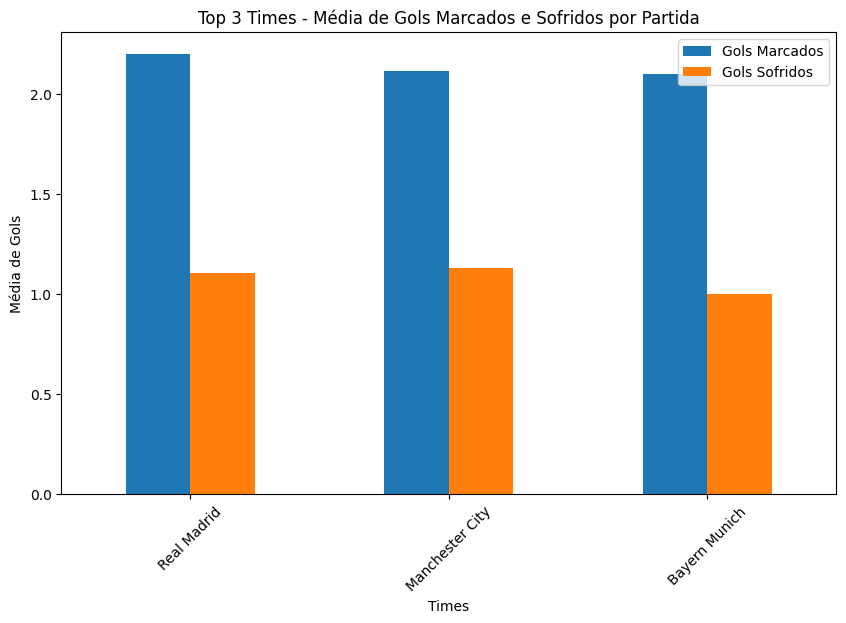

In [43]:
# Ordenar os times pela média de gols marcados e selecionar os top 3
top_3_teams = grouped.nlargest(3, 'avg_goals_marcados')

# Criar o gráfico de barras
top_3_teams[['avg_goals_marcados', 'avg_goals_sofridos']].plot(kind='bar', figsize=(10, 6))

plt.title('Top 3 Times - Média de Gols Marcados e Sofridos por Partida')
plt.xlabel('Times')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.legend(['Gols Marcados', 'Gols Sofridos'])
plt.show()

                          M.         W         D         L       Pt.  \
M.                  1.000000  0.976106  0.958617  0.820565  0.862193   
W                   0.976106  1.000000  0.915308  0.689073  0.946840   
D                   0.958617  0.915308  1.000000  0.768657  0.790397   
L                   0.820565  0.689073  0.768657  1.000000  0.449370   
Pt.                 0.862193  0.946840  0.790397  0.449370  1.000000   
goals_marcados      0.967950  0.992919  0.887848  0.697945  0.947989   
goals_sofridos      0.941563  0.873804  0.865754  0.932174  0.697004   
avg_goals_marcados  0.496096  0.631167  0.384060  0.084826  0.787849   
avg_goals_sofridos -0.626977 -0.679563 -0.704931 -0.232576 -0.725256   

                    goals_marcados  goals_sofridos  avg_goals_marcados  \
M.                        0.967950        0.941563            0.496096   
W                         0.992919        0.873804            0.631167   
D                         0.887848        0.865754       

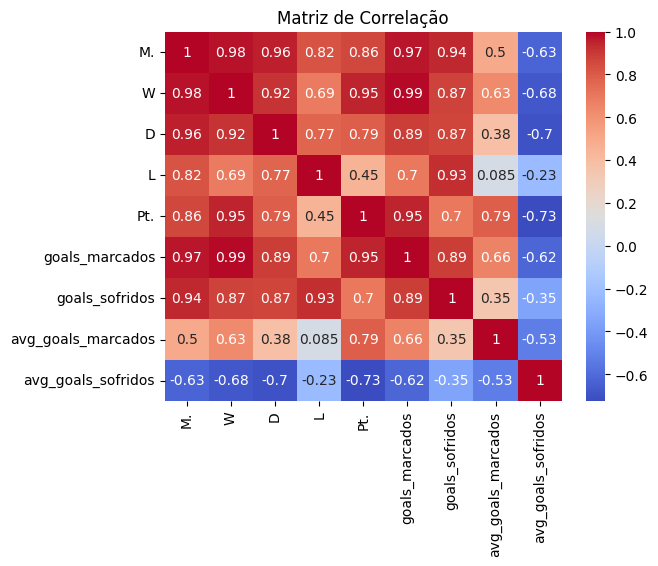

In [44]:
# Selecionar apenas colunas numéricas para o cálculo da correlação
numerical_cols = td.select_dtypes(include=np.number).columns
correlation_matrix = td[numerical_cols].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Visualizar a matriz de correlação usando um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Interpretação: M (Partidas Jogadas): Forte correlação com vitórias (W), empates (D), derrotas (L) e gols marcados. Menor correlação com pontos (Pt) e gols sofridos (goals_sofridos).

W (Vitórias): Altíssima correlação com partidas jogadas (M), e gols marcados. Correlação moderada com derrotas (L) e pontos (Pt).

D (Empates): Alta correlação com partidas jogadas (M), vitórias (W), e derrotas (L). Correlação mais fraca com pontos (Pt).

L (Derrotas): Forte correlação com partidas jogadas (M), vitórias (W) e empates (D). Correlação fraca com pontos (Pt) e gols sofridos.

Pt (Pontos): Moderada correlação com vitórias (W) e gols marcados (goals_marcados). Correlação baixa com derrotas (L) e gols sofridos (goals_sofridos).

goals_marcados (Gols Marcados): Altíssima correlação com vitórias (W), partidas jogadas (M) e moderada com pontos (Pt). Menor correlação com gols sofridos (goals_sofridos).

goals_sofridos (Gols Sofridos): Correlação mais baixa com todas as outras variáveis, especialmente pontos (Pt).

Top 3 times que menos sofrem gols:
              avg_goals_marcados  avg_goals_sofridos
Team                                                
Chelsea FC              1.695431            0.918782
Liverpool FC            1.888889            0.935897
Inter Milan             1.396135            0.995169


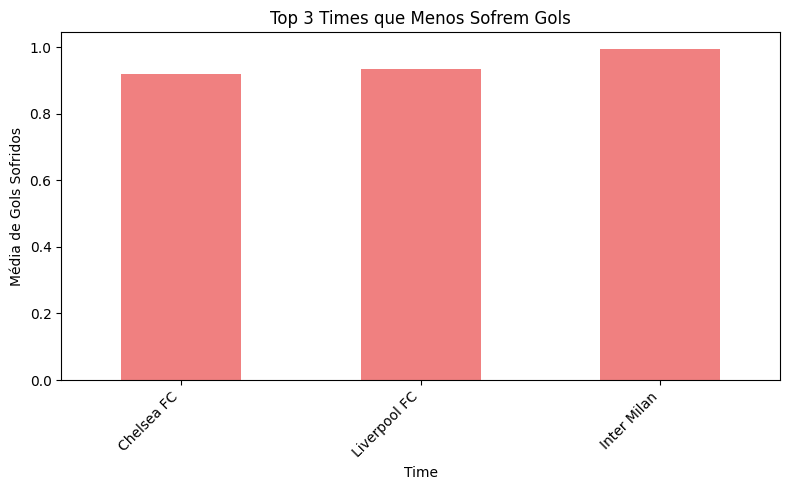

In [47]:
# Seleciona o top 3 times que menos sofrem gols
top_3_menor_goals_sofridos = grouped.nsmallest(3, 'avg_goals_sofridos')

# Exibe os resultados no console
print("Top 3 times que menos sofrem gols:")
print(top_3_menor_goals_sofridos)

# Cria um gráfico de barras para o top 3 times que menos sofrem gols
plt.figure(figsize=(8, 5))
top_3_menor_goals_sofridos['avg_goals_sofridos'].plot(kind='bar', color='lightcoral')
plt.title('Top 3 Times que Menos Sofrem Gols')
plt.xlabel('Time')
plt.ylabel('Média de Gols Sofridos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta o layout para evitar cortes nas labels

# Exibe o gráfico
plt.show()

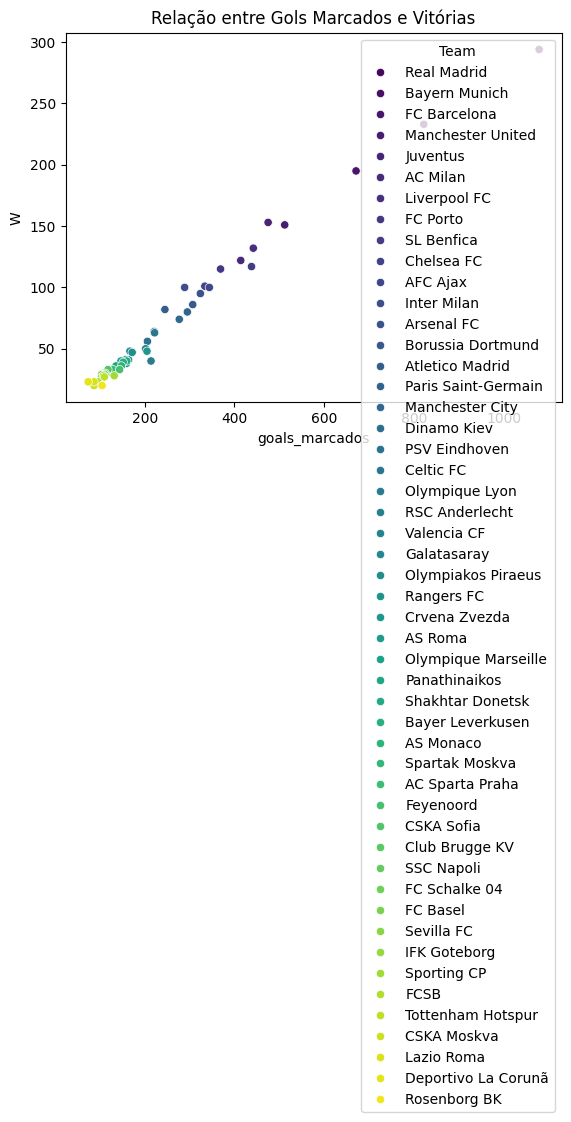

In [48]:
sns.scatterplot(data=td, x='goals_marcados', y='W', hue='Team', palette='viridis')
plt.title("Relação entre Gols Marcados e Vitórias")
plt.show()

In [49]:
features = td[['goals_marcados', 'goals_sofridos', 'W', 'L']]

In [50]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [51]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

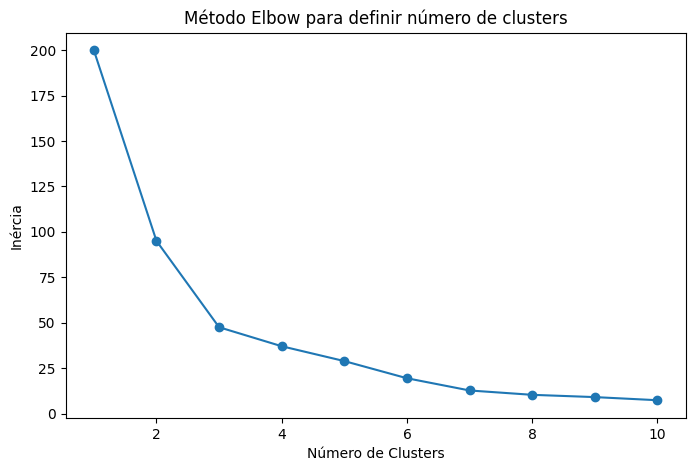

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para definir número de clusters')
plt.show()

In [53]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
td['Cluster'] = kmeans.fit_predict(scaled_features)

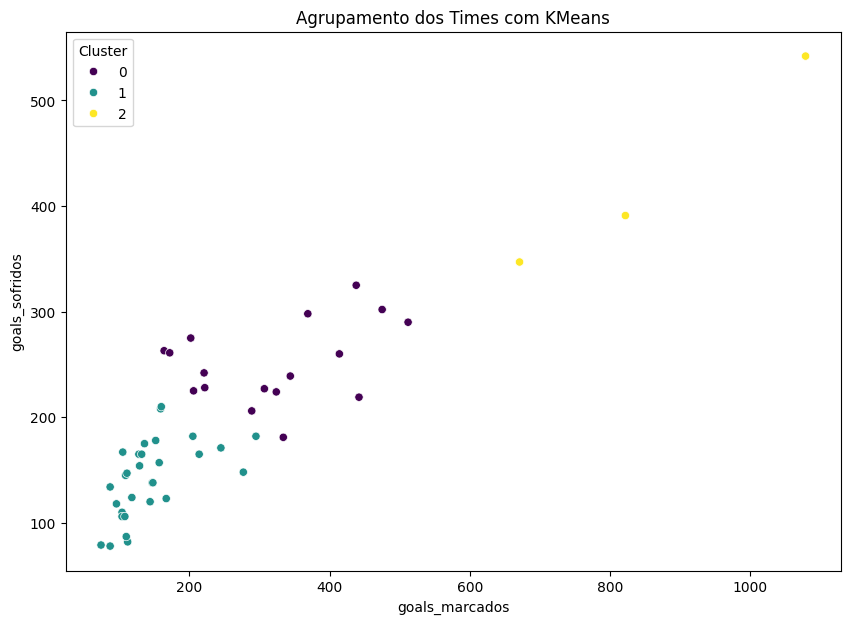

In [54]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=td, x='goals_marcados', y='goals_sofridos', hue='Cluster', palette='viridis')
plt.title("Agrupamento dos Times com KMeans")
plt.show()

In [55]:
# Seleciona apenas as colunas numéricas
colunas_numericas = td.select_dtypes(include=['number']).columns

# Calcula a média apenas para as colunas numéricas
cluster_summary = td.groupby('Cluster')[colunas_numericas].mean()
print(cluster_summary)

                 M.           W          D          L         Pt.  \
Cluster                                                             
0        211.529412   93.705882  48.352941  69.470588   70.529412   
1         97.966667   36.933333  21.933333  38.966667    3.400000   
2        406.666667  240.666667  79.333333  86.666667  426.333333   

         goals_marcados  goals_sofridos  avg_goals_marcados  \
Cluster                                                       
0            319.705882      250.882353            1.477540   
1            144.000000      142.066667            1.460499   
2            857.333333      426.666667            2.095198   

         avg_goals_sofridos  Cluster  
Cluster                               
0                  1.226125      0.0  
1                  1.468424      1.0  
2                  1.043664      2.0  


Cluster 0: Times medianos, com algumas vitórias, mas defesa vulnerável. Cluster 1: Times bons, equilibrados entre ataque e defesa. Cluster 2: Times de elite, com alta eficiência tanto no ataque quanto na defesa. Estes padrões podem ajudar a identificar que o sucesso na UCL está correlacionado com um alto número de vitórias, eficiência no ataque, e uma defesa sólida que sofre poucos gols (como observado especialmente no Cluster 2).

In [58]:
times_cluster_2 = td[td['Cluster'] == 2] # Alterado o nome da variável para times_cluster_1
print("\nTimes no Cluster 2:")
print(times_cluster_1[['Team', 'Cluster']]) # Agora usando o nome correto da variável


Times no Cluster 2:
            Team  Cluster
0    Real Madrid        2
1  Bayern Munich        2
2   FC Barcelona        2


In [59]:
times_cluster_0 = td[td['Cluster'] == 0]
print("Times no Cluster 0:")
print(times_cluster_0[['Team', 'Cluster']])

Times no Cluster 0:
                  Team  Cluster
3    Manchester United        0
4             Juventus        0
5             AC Milan        0
6         Liverpool FC        0
7             FC Porto        0
8           SL Benfica        0
9           Chelsea FC        0
10            AFC Ajax        0
11         Inter Milan        0
12          Arsenal FC        0
13   Borussia Dortmund        0
17         Dinamo Kiev        0
18       PSV Eindhoven        0
19           Celtic FC        0
21      RSC Anderlecht        0
23         Galatasaray        0
24  Olympiakos Piraeus        0


In [60]:
times_cluster_1 = td[td['Cluster'] == 1]
print("Times no Cluster 1:")
print(times_cluster_0[['Team', 'Cluster']])

Times no Cluster 1:
                  Team  Cluster
3    Manchester United        0
4             Juventus        0
5             AC Milan        0
6         Liverpool FC        0
7             FC Porto        0
8           SL Benfica        0
9           Chelsea FC        0
10            AFC Ajax        0
11         Inter Milan        0
12          Arsenal FC        0
13   Borussia Dortmund        0
17         Dinamo Kiev        0
18       PSV Eindhoven        0
19           Celtic FC        0
21      RSC Anderlecht        0
23         Galatasaray        0
24  Olympiakos Piraeus        0
